# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [1]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [19]:
print(iris["filename"])
print(iris.keys())
print(iris.data[:10])
print(type(iris.data))
print(iris.target_names)
iris["target"]

C:\Users\User\anaconda3\lib\site-packages\sklearn\datasets\data\iris.csv
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
# we only take the first two features.
X=iris.data[:,:2]
print(X.shape)
Y=iris.target
print(Y.shape)

(150, 2)
(150,)


In [17]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [25]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [27]:
#建立Target欄位與資料
y=pd.DataFrame(iris["target"],columns=["target"])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [30]:
#合併資料特徵欄位與目標欄位
iris_data=pd.concat([x,y],axis=1)
iris_data=iris_data[["sepal length (cm)","petal length (cm)","target"]]
iris_data.head(10)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [31]:
#只選擇目標為0與1的資料
iris_data=iris_data[iris_data["target"].isin([0,1])]
iris_data

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


## 切分訓練集與測試集
> train_test_split()

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(iris_data[["sepal length (cm)","petal length (cm)","target"]],iris_data["target"],test_size=0.2)

In [44]:
print(X_train.head())
print(X_train.shape)
print(X_test.head())
print(X_test.shape)

    sepal length (cm)  petal length (cm)  target
98                5.1                3.0       1
90                5.5                4.4       1
25                5.0                1.6       0
80                5.5                3.8       1
6                 4.6                1.4       0
(80, 3)
    sepal length (cm)  petal length (cm)  target
26                5.0                1.6       0
82                5.8                3.9       1
53                5.5                4.0       1
5                 5.4                1.7       0
63                6.1                4.7       1
(20, 3)


In [45]:
print(Y_train.head())
print(Y_train.shape)
print(Y_test.head())
print(Y_test.shape)

98    1
90    1
25    0
80    1
6     0
Name: target, dtype: int32
(80,)
26    0
82    1
53    1
5     0
63    1
Name: target, dtype: int32
(20,)


# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [46]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [49]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
# arr_y_train = np.array(Y_train)
arr_x_train[:5]

array([[-0.61946354,  0.05338161,  0.95118973],
       [-0.00953021,  1.03350298,  0.95118973],
       [-0.77194688, -0.92673976, -1.05131497],
       [-0.00953021,  0.61345096,  0.95118973],
       [-1.38188021, -1.06675709, -1.05131497]])

## use sklearn

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.

print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.50625 2.92375 0.525  ]
[0.65580938 1.42839453 0.49937461]


In [51]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[-0.61946354,  0.05338161,  0.95118973],
       [-0.00953021,  1.03350298,  0.95118973],
       [-0.77194688, -0.92673976, -1.05131497],
       [-0.00953021,  0.61345096,  0.95118973],
       [-1.38188021, -1.06675709, -1.05131497]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [52]:
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[-0.77194688 -0.92673976 -1.05131497]
 [ 0.44791979  0.68345963  0.95118973]
 [-0.00953021  0.7534683   0.95118973]
 [-0.16201354 -0.85673109 -1.05131497]
 [ 0.90536979  1.24352898  0.95118973]
 [-1.83933021 -1.2767831  -1.05131497]
 [-0.00953021 -1.13676576 -1.05131497]
 [ 0.60040313  1.31353765  0.95118973]
 [-1.07691355 -0.71671375 -1.05131497]
 [-0.77194688 -1.06675709 -1.05131497]]


you can also use fit_transform method (i.e., fit and then transform)    

In [53]:
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])

[[-0.60954536 -0.68707483 -0.81649658]
 [ 0.86814036  0.87755102  1.22474487]
 [ 0.31400822  0.94557823  1.22474487]
 [ 0.1292975  -0.61904762 -0.81649658]
 [ 1.42227251  1.42176871  1.22474487]
 [-1.90252037 -1.02721088 -0.81649658]
 [ 0.31400822 -0.89115646 -0.81649658]
 [ 1.05285108  1.48979592  1.22474487]
 [-0.97896679 -0.4829932  -0.81649658]
 [-0.60954536 -0.82312925 -0.81649658]]


In [54]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: 0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


51.02833333963353
30.769197622553165


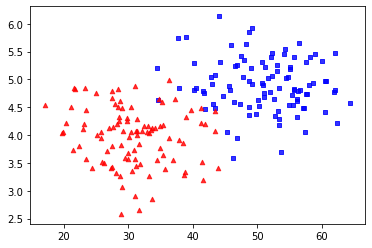

In [55]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [56]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [57]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [58]:
minmax_norm(x_val[:10])

array([0.74159413, 0.        , 0.07306841, 0.77227135, 0.22563143,
       0.92535439, 0.82949712, 0.13919914, 1.        , 0.78543809])

In [59]:
from sklearn.preprocessing import MinMaxScaler
x_val=x_val.reshape(-1, 1)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

[64.3559178]
[[0.7988472 ]
 [0.54798651]
 [0.57270353]
 [0.80922445]
 [0.62431136]
 [0.86100819]
 [0.82858234]
 [0.59507372]
 [0.88625873]
 [0.8136784 ]]
